In [2]:
# Dummy Variables & One Hot Encoding
# Source: https://www.youtube.com/watch?v=9yl6-HEY7_s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=7
# Ideal way of transforming text/strings to machine understandable numeric semantics.
# Excercise: To predict car price for given inputs (age and mileage)


import pandas as ps
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as ny

cardf = ps.read_csv(r'C:/Users/140115/PycharmProjects/JupyterMoons/data_files/hotenc_cars.csv')
cardf.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [13]:
# Transforming dummy vars to columns.
dummies = ps.get_dummies(cardf['Car Model'])
dummies#.head()

# Concat this dummies DF to main DF
merged = ps.concat([cardf,dummies],axis=1)
merged.head()
finaldf = merged.drop(['Car Model','Mercedez Benz C class'],axis='columns')
finaldf.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


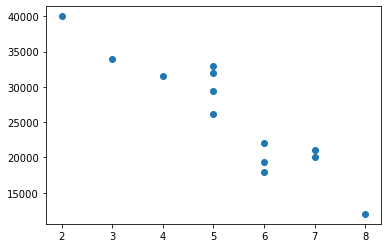

In [15]:
plt.scatter(finaldf['Age(yrs)'],finaldf['Sell Price($)'])

In [18]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [32]:
X = finaldf.drop(['Sell Price($)'],axis='columns')
y = finaldf['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [22]:
lin_model.fit(X,y)

LinearRegression()

In [31]:
# giving same format as X to predict Y
lin_model.predict([[69000,6,0,1]])

array([18705.2723644])

In [33]:
lin_model.score(X,y)

0.9417050937281082

In [34]:
# Part 2: Using label encoder - this will convert each string to numbers 0...n
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
carle = cardf
carle['Car Model'] = le.fit_transform(carle['Car Model'])
carle

# Defining X and y for next part
X = carle[['Car Model','Mileage','Age(yrs)']].values
X


array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [73]:

newy = carle[['Sell Price($)']].values
newy

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [83]:
# Part3: One hot encoding is converting all DF into a uniform numeric/float values after using label encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')
newX = ct.fit_transform(X)
newX ## <----- this is a transformed X considering OHE and LE



array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

array([[0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 9.10e+04, 8.00e+00],
       [1.00e+00, 6.70e+04, 6.00e+00],
       [1.00e+00, 8.30e+04, 7.00e+00],
       [1.00e+00, 7.90e+04, 7.00e+00],
       [1.00e+00, 5.90e+04, 5.00e+00]])

In [84]:
newy ## <----- not required to transform as its the target

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [48]:
lin_model.fit(newX,newy)

LinearRegression()

In [88]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

lin_model.predict([[0,0,1,45000,4]])

array([[36991.31721061]])

In [87]:
lin_model.predict([[0,1,0,86000,7]])

array([[11080.74313219]])

In [90]:
lin_model.score(newX,newy)

0.9417050937281083